# Sample Motorcycle Data

Below is a brief explanation and insight gathering from the sample data provided. A full breakdown and analysis would be much more extensive, but this shows the process of data processing, analysis, and arriving at maketing insights/strategy.

In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#allow value of "NA" (North America) to not be considered null
na_values = ["", 
             "#N/A", 
             "#N/A N/A", 
             "#NA", 
             "-1.#IND", 
             "-1.#QNAN", 
             "-NaN", 
             "-nan", 
             "1.#IND", 
             "1.#QNAN", 
             "<NA>", 
             "N/A", 
#              "NA", 
             "NULL", 
             "NaN", 
             "n/a", 
             "nan", 
             "null"]

In [3]:
#import data
df = pd.read_excel('C:/Users/Bogdan/Desktop/SampleSalesData1.xlsx', na_values=na_values, keep_default_na=False)

In [4]:
#observe raw data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2003-02-24,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022.0,USA,NA,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,2003-05-07,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100.0,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,2003-07-01,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508.0,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,2003-08-25,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003.0,USA,NA,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,2003-10-10,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium


<br>
The data frame contains 25 fields and seems to not be missing many values.
<br><br>

In [5]:
#analyze data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   float64       
 1   QUANTITYORDERED   2823 non-null   float64       
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   float64       
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   float64       
 8   MONTH_ID          2823 non-null   float64       
 9   YEAR_ID           2823 non-null   float64       
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   float64       
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

<br>
There are 2823 records in total, but some fields are missing data. ADDRESSLINE2 only has 302 entries, but this should make sense since the line is usually reserved for an APT, Suite, etc. Likewise, not every country is divided into States or has a Postal Code necessarily, depending on the country's laws. Let's check this below.
<br>
<br>

### Address, State, Country

In [6]:
df.ADDRESSLINE2.value_counts()

Level 3        55
Suite 400      48
Level 6        46
Level 15       46
2nd Floor      36
Suite 101      25
Suite 750      20
Floor No. 4    16
Suite 200      10
Name: ADDRESSLINE2, dtype: int64

<br>There are only 9 distinct values that are used for ADDRESSLINE2. These are for repeat customers of different orders.<br><br>

In [7]:
pd.crosstab(df.STATE, df.COUNTRY)

COUNTRY,Australia,Canada,Japan,UK,USA
STATE,,,,,
BC,0,48,0,0,0
CA,0,0,0,0,416
CT,0,0,0,0,61
Isle of Wight,0,0,0,26,0
MA,0,0,0,0,190
NH,0,0,0,0,34
NJ,0,0,0,0,21
NSW,92,0,0,0,0
NV,0,0,0,0,29


<br>
We can observe that most of the states are found in the USA, as expected. The other countries listed only have about 1-3 states each, so it is expected that many entries will be missing this field. 

Next, let's investigate some of the parameters of interest.
<br>
<br>

### Quanity Ordered

In [8]:
df.QUANTITYORDERED.describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

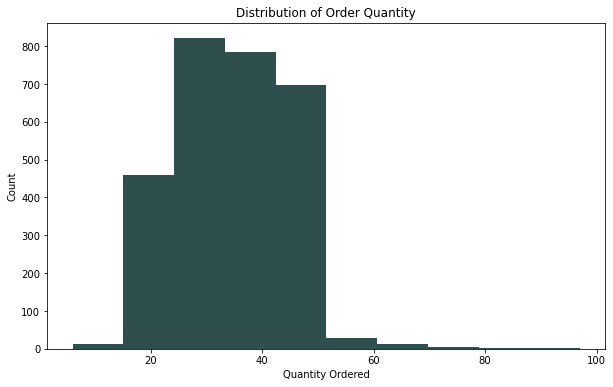

In [9]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.QUANTITYORDERED, color="darkslategray")
axes.set_title("Distribution of Order Quantity")
axes.set_xlabel("Quantity Ordered")
axes.set_ylabel("Count")

plt.show()

plt.close()

<br>
We can observe that among the 2823 orders, the average quantity ordered is about 35, with a very simial median. The biggest order was 97 while the smallest was 6. 

Next we will look at the price per item sold.
<br>
<br>

### Price per item

In [10]:
df.PRICEEACH.describe()

count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64

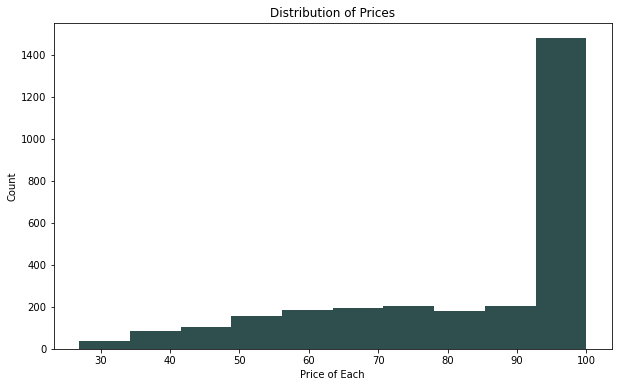

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.PRICEEACH, color="darkslategray")
axes.set_title("Distribution of Prices")
axes.set_xlabel("Price of Each")
axes.set_ylabel("Count")

plt.show()
plt.close()

<br>
We observe a massive skew towards the higher end of the prices. According to the statistics, half of the items sold have a price of at least \$95.70. The average price is $83.65. We should investigate later this drastic difference.

Next, we will look at the main field of importance - Sales.
<br>
<br>

### Sales

In [12]:
df.SALES.describe()

count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

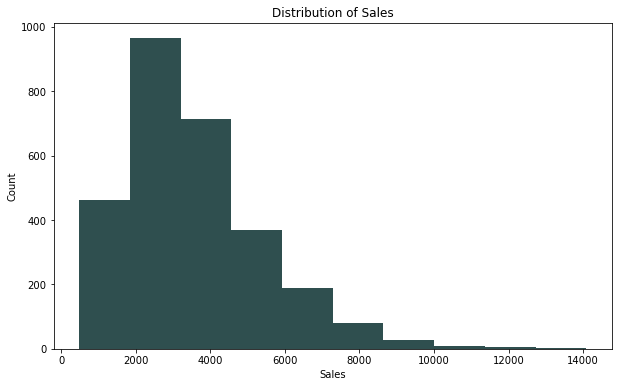

In [13]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.SALES, color="darkslategray")
axes.set_title("Distribution of Sales")
axes.set_xlabel("Sales")
axes.set_ylabel("Count")

plt.show()
plt.close()

<br>
From the chart, the average sale is around \$3500. We observe a left skewed histogram which indicates that the median sale is smaller than the mean, as evidenced by the statistics. 

Next, let's get some insight into the status of orders.
<br>
<br>

### Status and Status by Country

In [14]:
df.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [15]:
pd.crosstab(df.STATUS, df.COUNTRY)

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
STATUS,,,,,,,,,,,,,,,,,,,
Cancelled,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,16,0,14,14
Disputed,5,0,0,0,3,0,0,0,0,0,0,0,0,0,6,0,0,0,0
In Process,13,0,5,0,0,0,13,0,0,0,0,0,0,0,6,0,0,0,4
On Hold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,38
Resolved,0,8,0,0,8,0,0,0,0,0,0,0,0,0,18,0,0,0,13
Shipped,167,47,28,70,52,92,301,62,16,113,52,85,26,79,296,35,31,130,935


<br>
We observe that the company has great success in shipping orders. The concerning data that comes out is the 60 cancelled orders and the 44 on hold. When we look at the status by country, it is clear that the only 4 countries cancelling orders are Sweden, Switzerland, UK, and USA. Similarly, most of the orders that are on hold belong to the USA. It would be a good idea to alert the team of this trend so that a proactive approach can be taken to mitigate future cancellations or holds. 

Our next interest is to assess any seasonality trends.
<br>
<br>

### Seasonality <br>

In [16]:
pd.crosstab(df.YEAR_ID, df.QTR_ID)

QTR_ID,1.0,2.0,3.0,4.0
YEAR_ID,,,,
2003.0,130,162,184,524
2004.0,233,223,319,570
2005.0,302,176,0,0


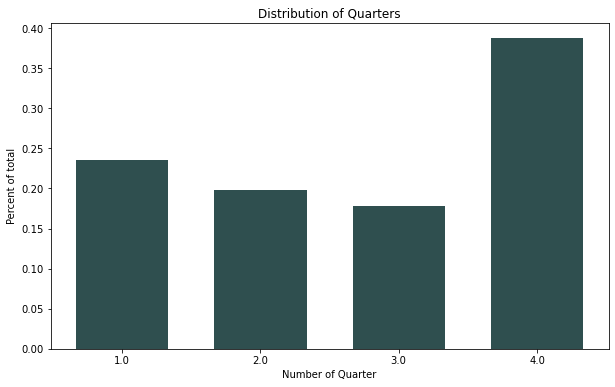

In [17]:
data = df.QTR_ID.value_counts(normalize=True).sort_index()
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0,1,2,3])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Quarters")
axes.set_xlabel("Number of Quarter")
axes.set_ylabel( "Percent of total")
axes.xaxis.grid(False)

plt.show()
plt.close()

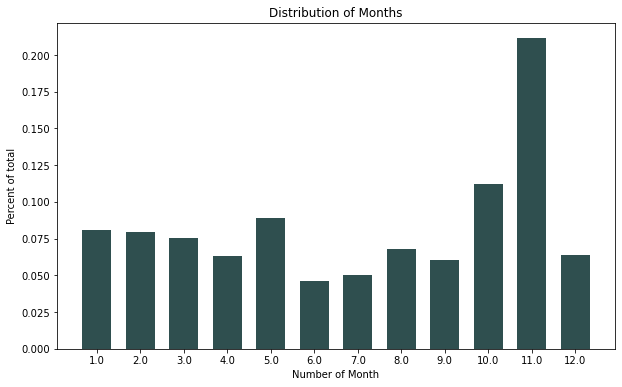

In [18]:
data = df.MONTH_ID.value_counts(normalize=True).sort_index()
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Months")
axes.set_xlabel("Number of Month")
axes.set_ylabel( "Percent of total")
axes.xaxis.grid(False)

plt.show()
plt.close()

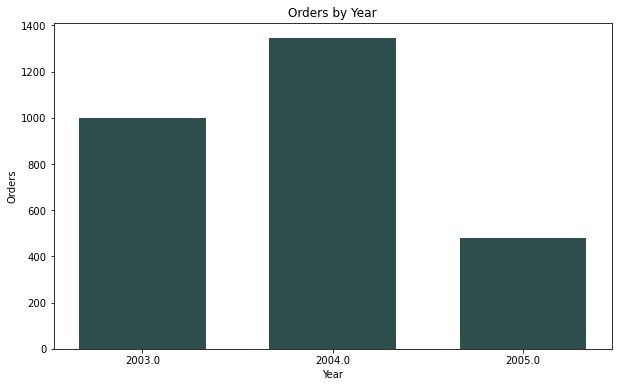

In [19]:
data = df.YEAR_ID.value_counts().sort_index()
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0,1,2])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Orders by Year")
axes.set_xlabel("Year")
axes.set_ylabel( "Orders")
axes.xaxis.grid(False)

plt.show()
plt.close()

<br>
From our cross-tabulation, it is clear that we do not have data for Q3 and Q4 of 2005. With this in mind, the Q4 sales over the year are very impressive, being higher that Q1 and Q2, and almost double those in Q3. October and November are the most profitable months, with December lagging behind, most likely due to the holidays. While we cannot inlcude 2005 in this trend yet, we do see a significant increase in sales from 2003 to 2004.

Next we will look at the distribution of products that are sold.
<br>
<br>

### Types of product sold<br>

In [20]:
df.PRODUCTLINE.value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

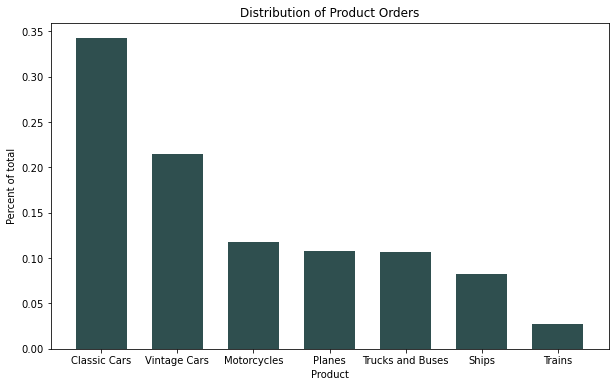

In [21]:
data = df.PRODUCTLINE.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0,1,2,3,4,5,6])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Product Orders")
axes.set_xlabel("Product")
axes.set_ylabel( "Percent of total")
axes.xaxis.grid(False)

plt.show()
plt.close()

<br>
We observe that more than 50% of the orders are from Classic Cars and Vintage Cars. On the other hand, trains only make up less that 5% of orders, having sold just 77 times in the past two and a half years. The team should evaluate the relationship and benefits of keeping the train customers and analyze whether the same focus would be better suited for the 4 other categories.

Finally, the last variable we will look at is Deal Size.
<br>
<br>

### Deal Size<br>

In [22]:
df.DEALSIZE.value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

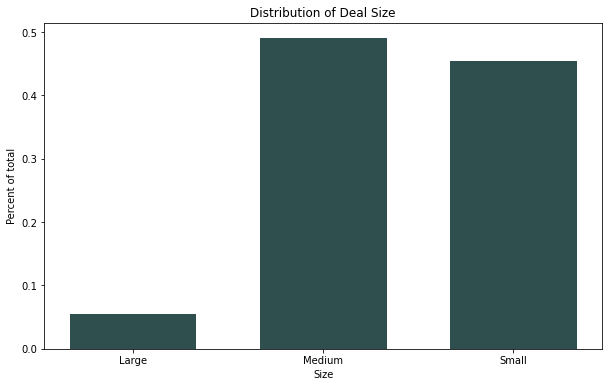

In [23]:
data = df.DEALSIZE.value_counts(normalize=True).sort_index()
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="darkslategray")
axes.set_xticks([0,1,2])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Deal Size")
axes.set_xlabel("Size")
axes.set_ylabel( "Percent of total")
axes.xaxis.grid(False)

plt.show()
plt.close()

<br>
The medium and small deals make up about 95% of the orders, while the large deals are only 5%. This is a slightly red flag that should be analyzed more carefully, as more orders should be expected from the larger deals than the smaller ones.<br><br>

# Deeper dive into sales

### Sales vs. Price of each item

<br>
We will use correlation coefficients to gauge the relationship between Sales and price of each item.
<br><br>

In [24]:
print("r   = ", stats.pearsonr(df.SALES, df.PRICEEACH)[0])
print("rho = ", stats.spearmanr(df.SALES, df.PRICEEACH)[0])

r   =  0.6578409283176943
rho =  0.7876652102023145


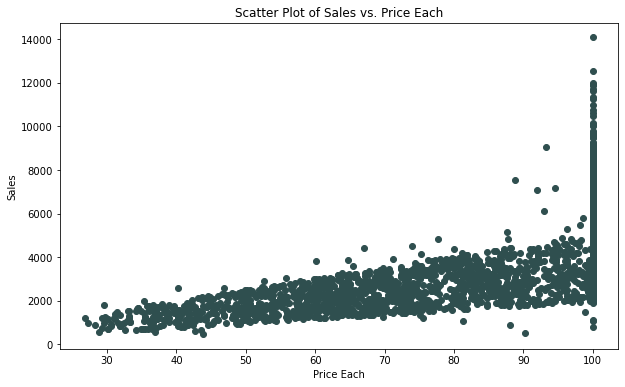

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(df.PRICEEACH, df.SALES, marker="o", color="darkslategray")

axes.set_ylabel("Sales")
axes.set_xlabel("Price Each")
axes.set_title("Scatter Plot of Sales vs. Price Each")

plt.show()
plt.close()

<br>There is a small correlation between the sales and the price of each item. The higher the price of the item, the higher the sale. This should make sense. However, companies are known to give incentives such as lower prices in order to boost sales. Could this strategy be used here? Is it used here already but is it backfiring? Let's find out.<br><br>

### Quantity Ordered vs Price per item

In [26]:
print("r   = ", stats.pearsonr(df.QUANTITYORDERED, df.PRICEEACH)[0])
print("rho = ", stats.spearmanr(df.QUANTITYORDERED, df.PRICEEACH)[0])

r   =  0.005564033259239955
rho =  0.0064830510970576745


<br>The correlation between the quantity ordered and the price of each item doesn't tell us much, so we will need to create a more useful field.<br><br>

### Creating a "discount" field<br><br>

In [27]:
df['DISCOUNT'] = (df.MSRP-df.PRICEEACH)/df.MSRP

<br>The DISCOUNT variable now describes the percent discount (or upsell) that the company is giving the customers from the MSRP. The higher the value, the higher the discount the customer receives.<br><br>

In [28]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DISCOUNT
0,10107.0,30.0,95.70,2.0,2871.00,2003-02-24,Shipped,1.0,2.0,2003.0,...,NaN,NYC,NY,10022.0,USA,NA,Yu,Kwai,Small,-0.007368
1,10121.0,34.0,81.35,5.0,2765.90,2003-05-07,Shipped,2.0,5.0,2003.0,...,NaN,Reims,NaN,51100.0,France,EMEA,Henriot,Paul,Small,0.143684
2,10134.0,41.0,94.74,2.0,3884.34,2003-07-01,Shipped,3.0,7.0,2003.0,...,NaN,Paris,NaN,75508.0,France,EMEA,Da Cunha,Daniel,Medium,0.002737
3,10145.0,45.0,83.26,6.0,3746.70,2003-08-25,Shipped,3.0,8.0,2003.0,...,NaN,Pasadena,CA,90003.0,USA,NA,Young,Julie,Medium,0.123579
4,10159.0,49.0,100.00,14.0,5205.27,2003-10-10,Shipped,4.0,10.0,2003.0,...,NaN,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium,-0.052632


### <br>Discount<br><br>

In [29]:
df.DISCOUNT.describe()

count    2823.000000
mean        0.095141
std         0.270089
min        -2.030303
25%        -0.027614
50%         0.118500
75%         0.242424
max         0.771338
Name: DISCOUNT, dtype: float64

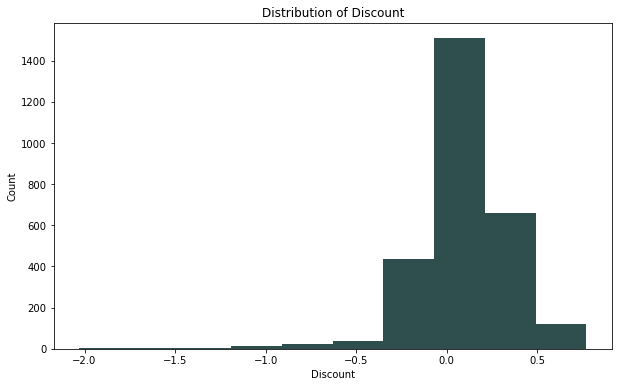

In [30]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.DISCOUNT, color="darkslategray")
axes.set_title("Distribution of Discount")
axes.set_xlabel("Discount")
axes.set_ylabel("Count")

plt.show()
plt.close()

In [31]:
print("r   = ", stats.pearsonr(df.QUANTITYORDERED, df.DISCOUNT)[0])
print("rho = ", stats.spearmanr(df.QUANTITYORDERED, df.DISCOUNT)[0])

r   =  0.02849770121209785
rho =  0.027321074397041085


<br>We still do not see a signifcant effect of the quantity ordered on the amount of discount that a customer receives. However, we DO see that some customers are getting a massive discount, with values as high as 77% off. On the other hand, others are getting charged twice as much for some products. Clearly this is not an effect of the quantity of product orders. Could be favoritism towards the size of the deal?<br><br>

### Discount by Deal Size

In [32]:
#create describe function for categories
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [33]:
describe_by_category(df, "DISCOUNT", "DEALSIZE", transpose=True)

DEALSIZE       Large       Medium        Small
count     157.000000  1384.000000  1282.000000
mean        0.282681     0.108357     0.057905
std         0.383636     0.282505     0.225230
min        -2.030303    -1.857143    -2.030303
25%         0.290780     0.000000    -0.053940
50%         0.404762     0.152542     0.054373
75%         0.481865     0.290780     0.156702
max         0.532710     0.641098     0.771338


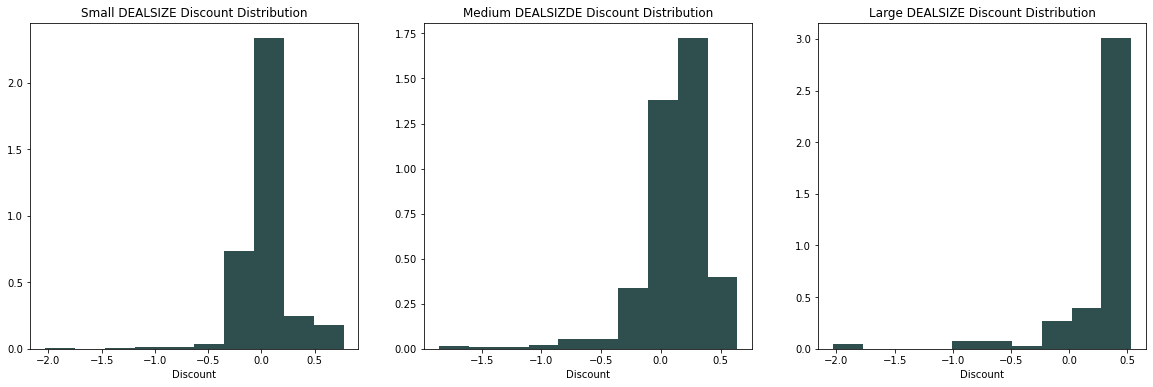

In [34]:
grouped =df.groupby("DEALSIZE")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["DISCOUNT"].get_group("Small"),color="darkslategray",density=True)
axes.set_title("Small DEALSIZE Discount Distribution")
axes.set_xlabel("Discount")

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["DISCOUNT"].get_group("Medium"),color="darkslategray",density=True)
axes.set_title("Medium DEALSIZDE Discount Distribution")
axes.set_xlabel("Discount")

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["DISCOUNT"].get_group("Large"),color="darkslategray",density=True)
axes.set_title("Large DEALSIZE Discount Distribution")
axes.set_xlabel("Discount")


plt.show()
plt.close()

<br>Bingo. From that statistics, we can clearly see that the large Deal Sizes are getting an average discount of 28%, while the medium and small deals are getting 11% and 5% respectively. The distributions also indicate this, showing the large Deal Sizes getting mostly discounts while the small Deal Sizes either not getting discounts or paying slightly more. The question now becomes whether or not these discounts are of any use to the company in terms of sales. <br><br>

### Sales vs Deal Size<br><br>

In [35]:
describe_by_category(df, "SALES", "DEALSIZE", transpose=True)

DEALSIZE         Large       Medium        Small
count       157.000000  1384.000000  1282.000000
mean       8293.753248  4398.433699  2061.682800
std        1294.739895  1047.090148   577.183322
min        7016.310000  3002.400000   482.130000
25%        7329.060000  3516.285000  1638.335000
50%        8008.560000  4162.750000  2113.975000
75%        8754.690000  5176.410000  2544.592500
max       14082.800000  6996.420000  2999.970000


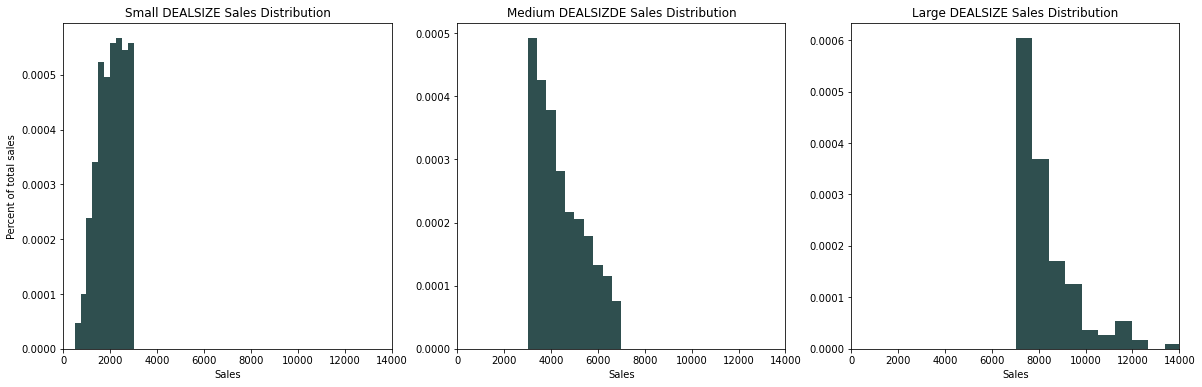

In [36]:
grouped =df.groupby("DEALSIZE")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["SALES"].get_group("Small"),color="darkslategray",density=True)
axes.set_title("Small DEALSIZE Sales Distribution")
axes.set_xlabel("Sales")
axes.set_xlim((0,14000))
axes.set_ylabel("Percent of total sales")

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["SALES"].get_group("Medium"),color="darkslategray",density=True)
axes.set_title("Medium DEALSIZDE Sales Distribution")
axes.set_xlabel("Sales")
axes.set_xlim((0,14000))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["SALES"].get_group("Large"),color="darkslategray",density=True)
axes.set_title("Large DEALSIZE Sales Distribution")
axes.set_xlabel("Sales")
axes.set_xlim((0,14000))



plt.show()
plt.close()

<br>There are several insights that can be learned from the statistics and distributions. Looking at the averages, we can see that the sales double with each increase in deal size category. Small deals buy an average of \\$2061, Mediums buy an average of \\$4398, and Larges buy an average of \\$8294. Additionally, not easily seen in the numbers but shown beautifully in the distributions is the clear cut-off for sales and deal sizes. Small deals are only up to \\$3000 in sales, Medium deals are from \\$3000 to \\$7000, and Large deals are above \\$7000. This can now be interpreted as an artifical cut-off designed maybe by the database manager to categorize the sales, but this was not apparent from the initial analysis of the data. <br><br>

In the future, more analysis can be performed to find insights and trends by looking at other factors. Focusing on the order status could lead to some hints on how to decrease the number of disputed or cancelled orders. By looking at the quantity ordered or sales for each territory/country, one could get a sense of where to focus the company's effors, and where it is best to reevaluate the relationships. Finally, one could use regresison to predict sales, orders, and quantity based on several factors like country, date and time, and deal size.